In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
eca_results = pd.read_csv('yolov8_ECA_results.csv')
gam_results = pd.read_csv('yolov8_GAM_results.csv')
resblock_cbam_results = pd.read_csv('yolov8_ResBlock_CBAM_results.csv')
sa_results = pd.read_csv('yolov8_SA_results.csv')
yolov8m_results = pd.read_csv('yolov8m_results.csv')
yolov8m_MLCA_results = pd.read_csv('MLCA.csv')

In [51]:
last_row_values = {
    "Yolov8_ECA": eca_results.iloc[-1, 1:-3],
    "Yolov8_GAM": gam_results.iloc[-1, 1:-3],
    "Yolov8_ResBlock_CBAM": resblock_cbam_results.iloc[-1, 1:-3],
    "Yolov8_SA": sa_results.iloc[-1, 1:-3],
    "Yolov8m": yolov8m_results.iloc[-1, 1:-3],
    "Yolov8_MLCA": yolov8m_MLCA_results.iloc[-1, 1:-3]
}

In [56]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.strip()
    return df

# Clean column names for each DataFrame
eca_results = clean_column_names(eca_results)
gam_results = clean_column_names(gam_results)
resblock_cbam_results = clean_column_names(resblock_cbam_results)
sa_results = clean_column_names(sa_results)
yolov8m_results = clean_column_names(yolov8m_results)
yolov8m_MLCA_results = clean_column_names(yolov8m_MLCA_results)

# After cleaning, re-define last_row_values dictionary
last_row_values = {
    "Yolov8_ECA": eca_results.iloc[-1, 1:-3],
    "Yolov8_GAM": gam_results.iloc[-1, 1:-3],
    "Yolov8_ResBlock_CBAM": resblock_cbam_results.iloc[-1, 1:-3],
    "Yolov8_SA": sa_results.iloc[-1, 1:-3],
    "Yolov8m": yolov8m_results.iloc[-1, 1:-3],
    "Yolov8_MLCA": yolov8m_MLCA_results.iloc[-1, 1:-3]
}

# Then create DataFrame
all_metrics = set()
for data in last_row_values.values():
    all_metrics.update(data.index)

last_epoch_data = pd.DataFrame({
    metric: [df.get(metric, np.nan) for df in last_row_values.values()]
    for metric in all_metrics
}, index=last_row_values.keys())

# Print the DataFrame to verify
print(last_epoch_data)




                      val/cls_loss  val/dfl_loss  val/box_loss  \
Yolov8_ECA                 0.56861        1.2147        1.6142   
Yolov8_GAM                 0.57860        1.2030        1.6240   
Yolov8_ResBlock_CBAM       0.57008        1.2155        1.6193   
Yolov8_SA                  0.56498        1.2156        1.6047   
Yolov8m                    0.56818        1.2151        1.6118   
Yolov8_MLCA                0.58028        1.2202        1.4033   

                      metrics/mAP50(B)  train/cls_loss  metrics/precision(B)  \
Yolov8_ECA                     0.62456         0.54733               0.71118   
Yolov8_GAM                     0.60410         0.57012               0.62176   
Yolov8_ResBlock_CBAM           0.61887         0.54639               0.67651   
Yolov8_SA                      0.61341         0.54361               0.70265   
Yolov8m                        0.61240         0.54640               0.67590   
Yolov8_MLCA                    0.59187         0.52255   

In [57]:
last_epoch_data = pd.DataFrame({
    metric: [df[metric] for df in last_row_values.values()]
    for metric in last_row_values["Yolov8_ECA"].index
}, index=last_row_values.keys())

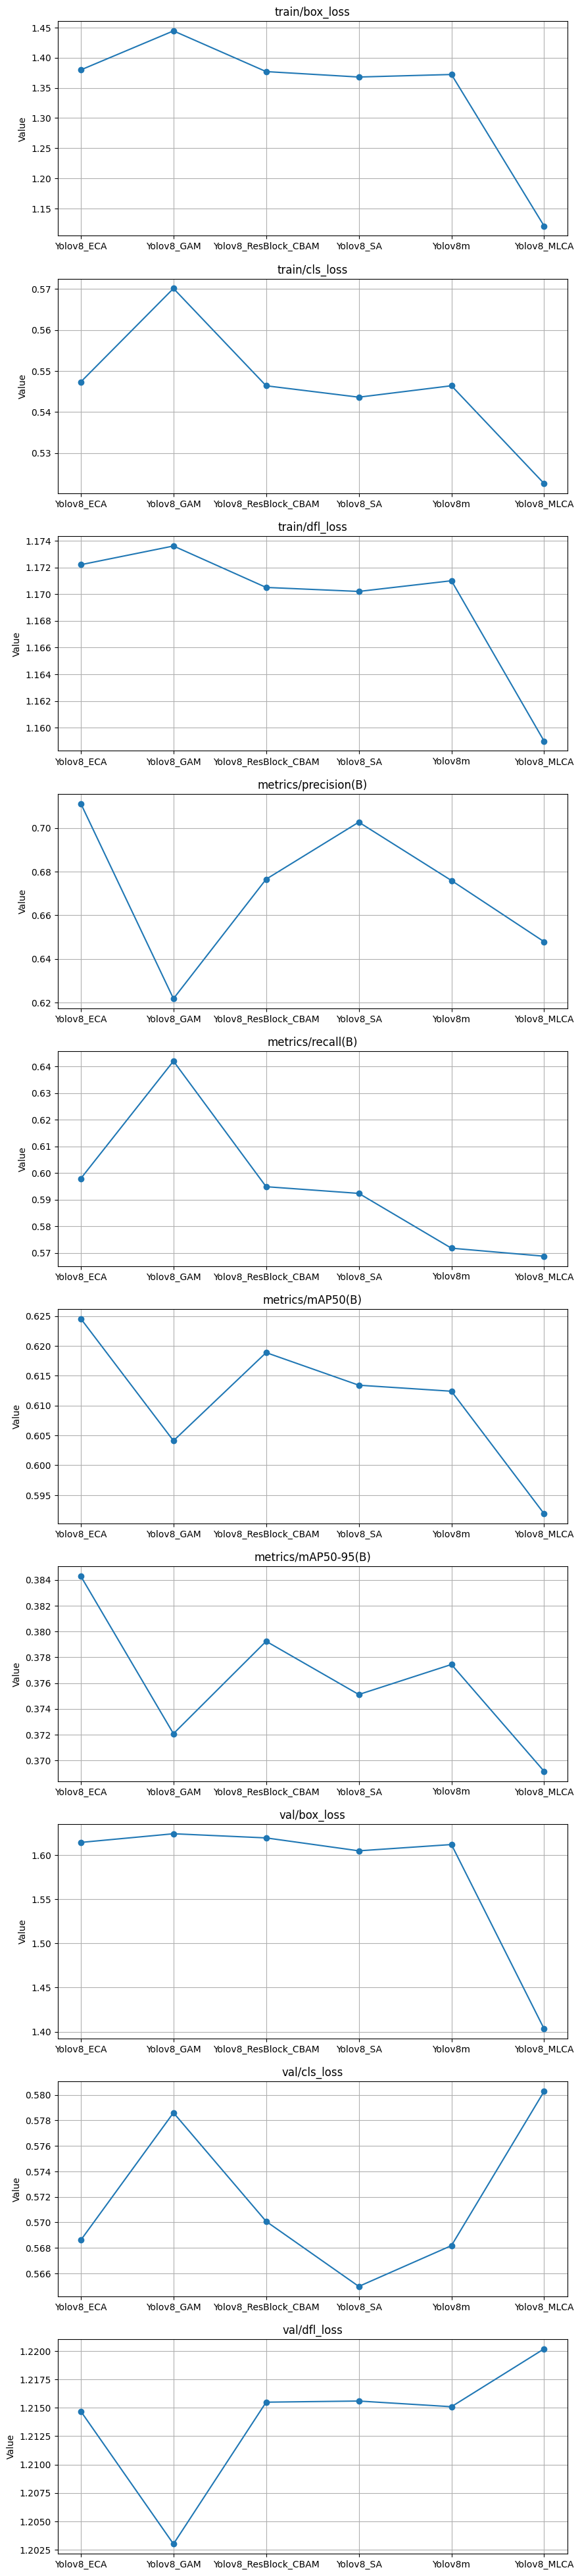

<Figure size 1000x600 with 0 Axes>

In [58]:
# Creating individual line plots for each metric for clearer comparison
num_metrics = len(last_epoch_data.columns)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5*num_metrics))

for i, metric in enumerate(last_epoch_data.columns):
    axes[i].plot(last_epoch_data.index, last_epoch_data[metric], marker='o', linestyle='-')
    axes[i].set_title(metric)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()
